In [36]:
import deeptile
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from deeptile.extensions import segmentation
from deeptile.extensions import stitch
matplotlib.rcParams['figure.dpi'] = 300

import tifffile

In [96]:
directory = '/Users/grantkinsler/RajLab Dropbox/Grant Kinsler/SpatialBarcodes/ImagingData/20240516_mouseexp_validation/spatial barcodes tumor validation/roi_3/'

file_list = ['strip_11.tiff','strip_12.tiff','strip_13.tiff']

In [97]:
tiff_11 = tifffile.imread(f'{directory}{file_list[0]}')
tiff_12 = tifffile.imread(f'{directory}{file_list[1]}')
tiff_13 = tifffile.imread(f'{directory}{file_list[2]}')

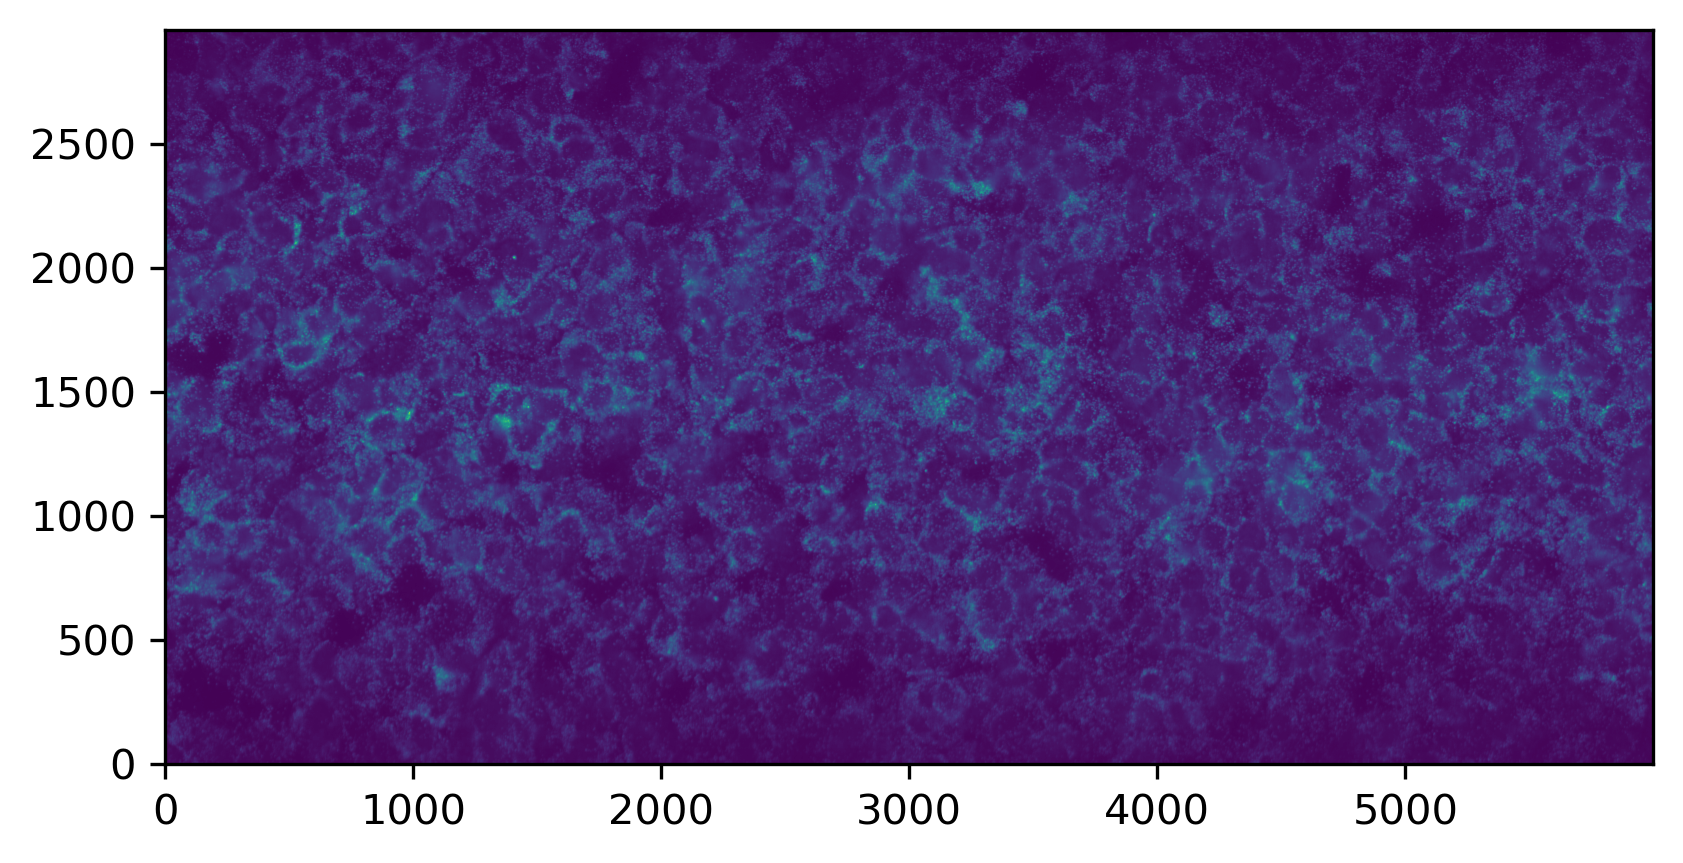

In [98]:
plt.imshow(tiff_11[1][:,6000:12000],origin='lower') 

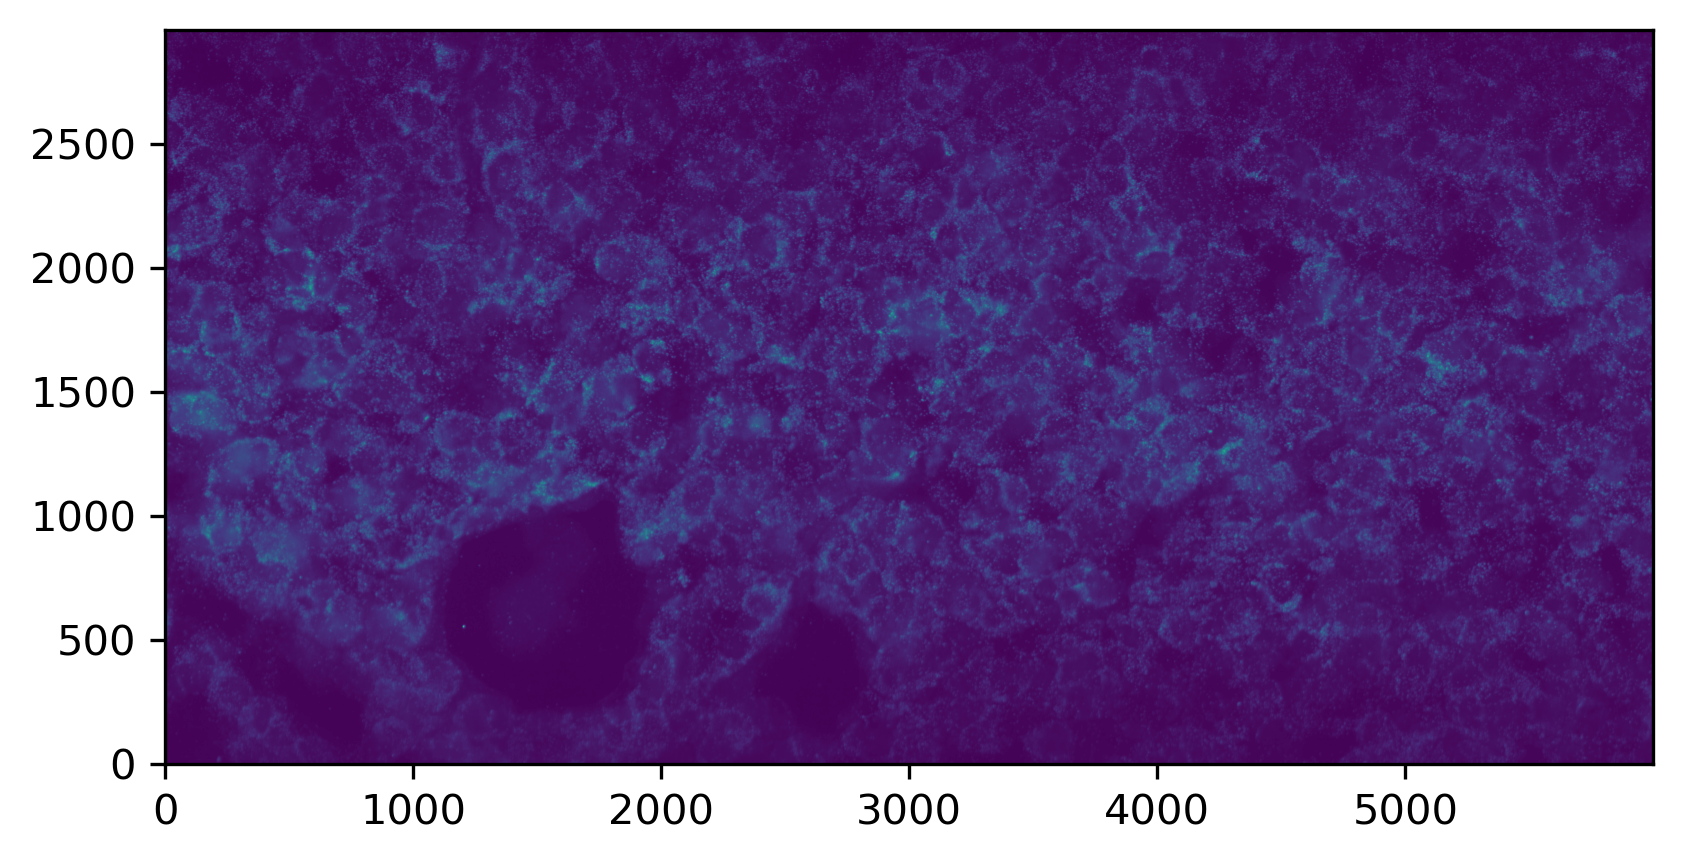

In [99]:
plt.imshow(tiff_12[1][:,6000:12000],origin='lower')

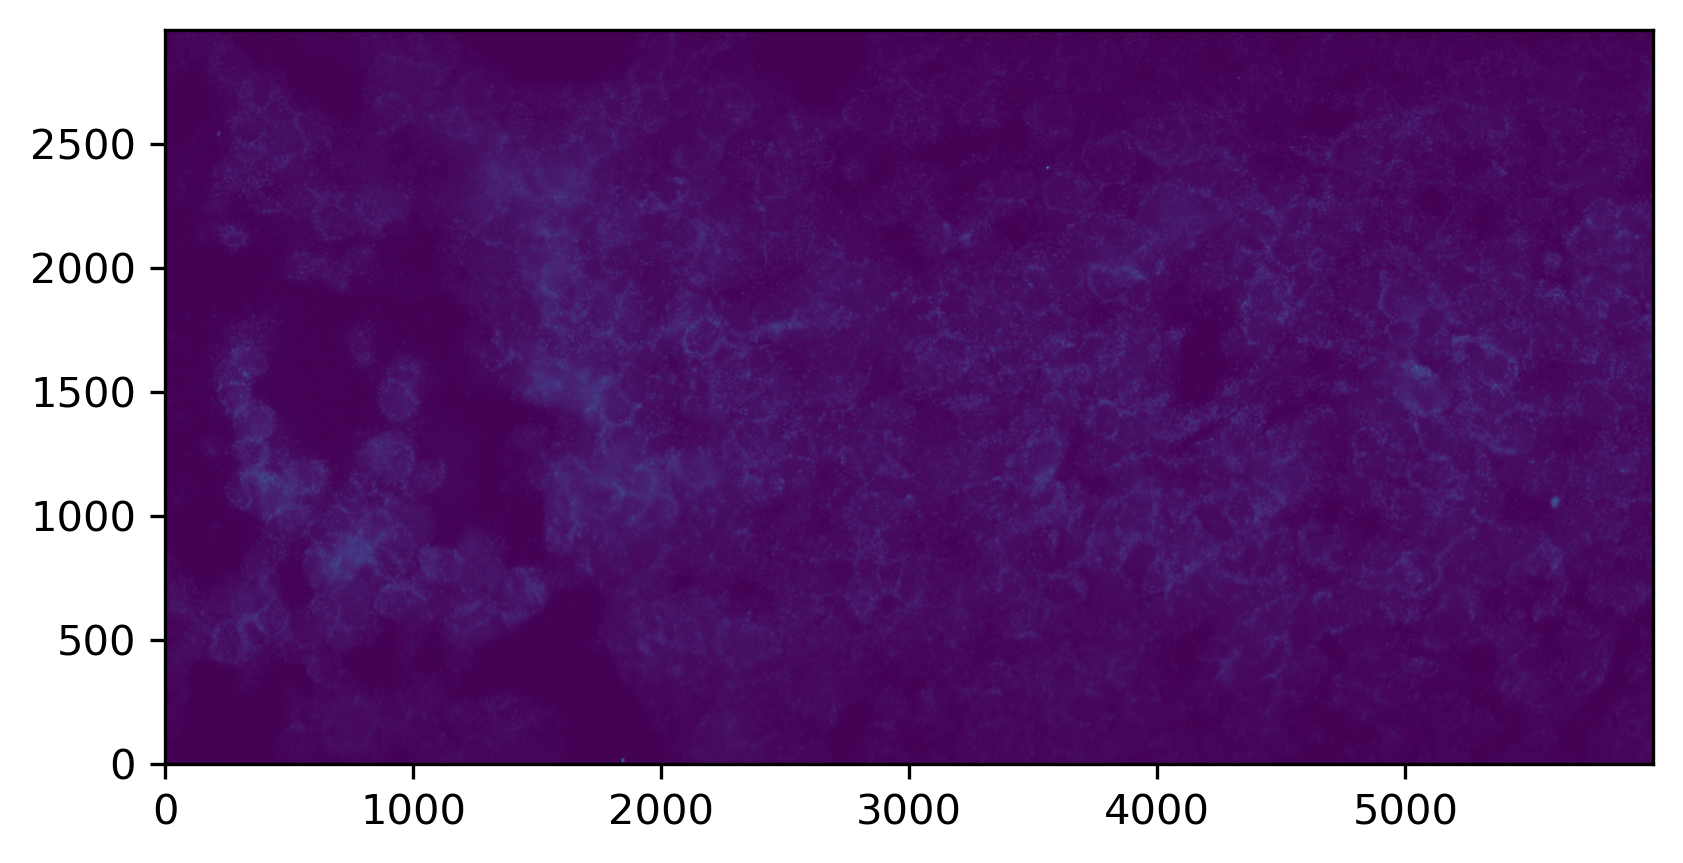

In [100]:
plt.imshow(tiff_13[1][:,6000:12000],origin='lower')

In [101]:
tiff_both = np.concatenate([tiff_13,tiff_12,tiff_11],axis=1)

dt_both = deeptile.load(tiff_both)

In [102]:
tiles_both = dt_both.get_tiles(tile_size=(1000,1000),overlap=(0.1, 0.1))

In [103]:
# dt = deeptile.load(full_filename)
stitched_image = stitch.stitch_image(tiles_both, blend=True)

In [104]:
stitched_image.shape

(4, 8880, 37644)

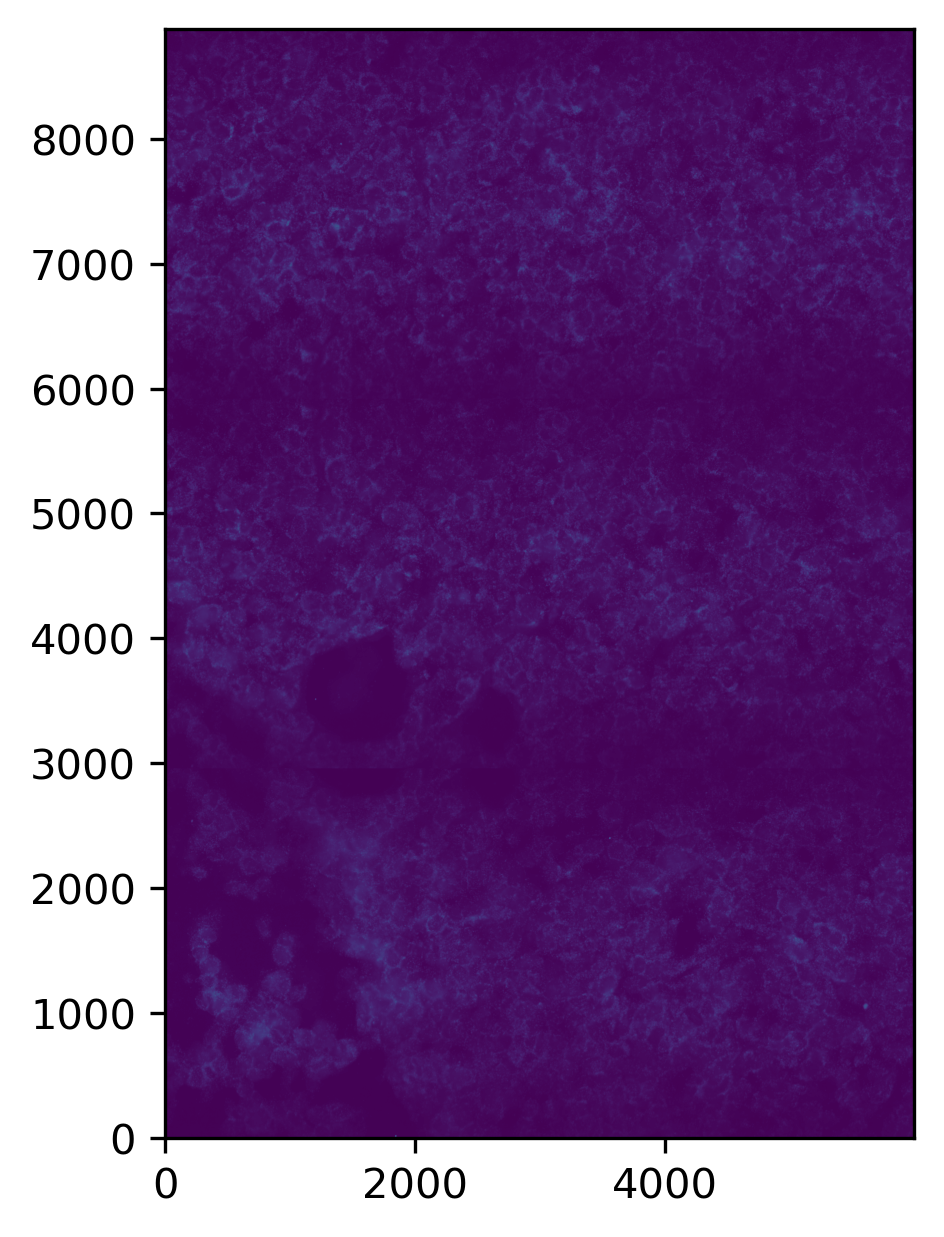

In [105]:
plt.imshow(stitched_image[1][:,6000:12000],origin='lower')